<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_cluster_data_multi_delta_(_2_4)_n60_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-2.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.4_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.267980,26.930096,-0.022124,59.175952,59.195615,-0.019663
1,0.0,1.0,23.093945,60.200658,-0.006251,93.288353,93.295234,-0.006881
2,0.0,2.0,85.268068,26.213230,-0.035476,121.445823,121.478130,-0.032307
3,0.0,3.0,26.868020,44.729373,-0.000433,81.596961,81.596544,0.000417
4,0.0,4.0,84.505101,82.809138,0.007896,177.322134,177.316351,0.005783
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.377528,31.231256,0.000132,92.608916,92.614797,-0.005880
59996,999.0,56.0,68.435483,49.106272,-0.005419,127.536336,127.544628,-0.008292
59997,999.0,57.0,91.646395,74.319994,0.006637,175.973026,175.964871,0.008155
59998,999.0,58.0,50.978802,59.138695,-0.012421,120.105076,120.119790,-0.014714


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.267980  26.930096 -0.022124   59.175952   59.195615 -0.019663
      1.0    23.093945  60.200658 -0.006251   93.288353   93.295234 -0.006881
      2.0    85.268068  26.213230 -0.035476  121.445823  121.478130 -0.032307
      3.0    26.868020  44.729373 -0.000433   81.596961   81.596544  0.000417
      4.0    84.505101  82.809138  0.007896  177.322134  177.316351  0.005783
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.377528  31.231256  0.000132   92.608916   92.614797 -0.005880
      56.0   68.435483  49.106272 -0.005419  127.536336  127.544628 -0.008292
      57.0   91.646395  74.319994  0.006637  175.973026  175.964871  0.008155
      58.0   50.978802  59.138695 -0.012421  120.105076  120.119790 -0.014714
      59.0   50.109065  74.391371  0.001991  134.502427  134.500725  0.001702

[60000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.267980  26.930096 -0.022124   59.175952   59.195615 -0.019663
      1.0    23.093945  60.200658 -0.006251   93.288353   93.295234 -0.006881
      2.0    85.268068  26.213230 -0.035476  121.445823  121.478130 -0.032307
      3.0    26.868020  44.729373 -0.000433   81.596961   81.596544  0.000417
      4.0    84.505101  82.809138  0.007896  177.322134  177.316351  0.005783
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.377528  31.231256  0.000132   92.608916   92.614797 -0.005880
      56.0   68.435483  49.106272 -0.005419  127.536336  127.544628 -0.008292
      57.0   91.646395  74.319994  0.006637  175.973026  175.964871  0.008155
      58.0   50.978802  59.138695 -0.012421  120.105076  120.119790 -0.014714
      59.0   50.109065  74.391371  0.001991  134.502427  134.500725  0.001702

[60000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,22.267980,26.930096,-0.022124,59.175952,59.195615,-0.019663
1,0.0,1.0,23.093945,60.200658,-0.006251,93.288353,93.295234,-0.006881
2,0.0,2.0,85.268068,26.213230,-0.035476,121.445823,121.478130,-0.032307
3,0.0,3.0,26.868020,44.729373,-0.000433,81.596961,81.596544,0.000417
4,0.0,4.0,84.505101,82.809138,0.007896,177.322134,177.316351,0.005783
...,...,...,...,...,...,...,...,...
59995,999.0,55.0,51.377528,31.231256,0.000132,92.608916,92.614797,-0.005880
59996,999.0,56.0,68.435483,49.106272,-0.005419,127.536336,127.544628,-0.008292
59997,999.0,57.0,91.646395,74.319994,0.006637,175.973026,175.964871,0.008155
59998,999.0,58.0,50.978802,59.138695,-0.012421,120.105076,120.119790,-0.014714


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    22.267980  26.930096 -0.022124   59.175952   59.195615 -0.019663
      1.0    23.093945  60.200658 -0.006251   93.288353   93.295234 -0.006881
      2.0    85.268068  26.213230 -0.035476  121.445823  121.478130 -0.032307
      3.0    26.868020  44.729373 -0.000433   81.596961   81.596544  0.000417
      4.0    84.505101  82.809138  0.007896  177.322134  177.316351  0.005783
...                ...        ...       ...         ...         ...       ...
999.0 55.0   51.377528  31.231256  0.000132   92.608916   92.614797 -0.005880
      56.0   68.435483  49.106272 -0.005419  127.536336  127.544628 -0.008292
      57.0   91.646395  74.319994  0.006637  175.973026  175.964871  0.008155
      58.0   50.978802  59.138695 -0.012421  120.105076  120.119790 -0.014714
      59.0   50.109065  74.391371  0.001991  134.502427  134.500725  0.001702

[60000 rows x 6 columns]

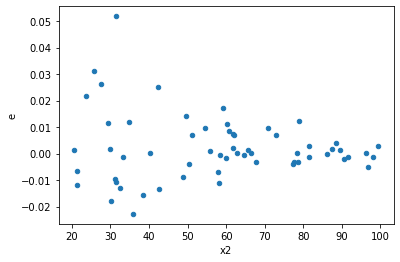

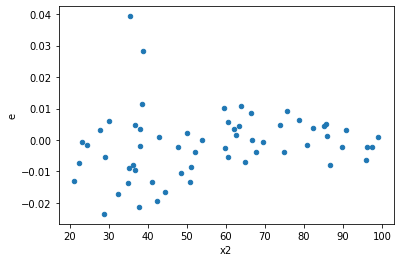

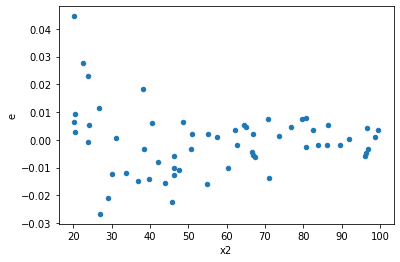

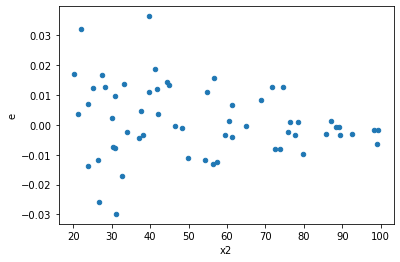

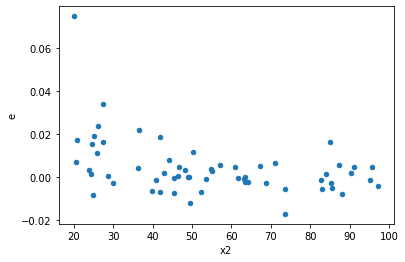

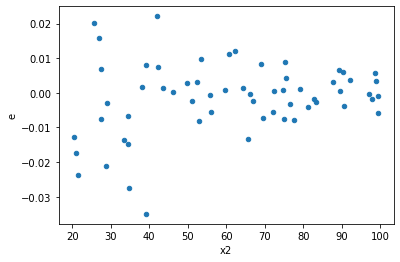

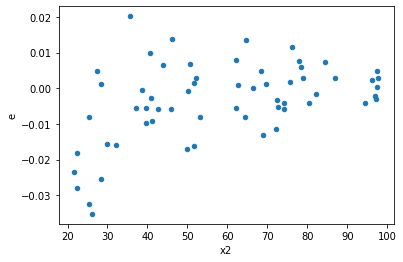

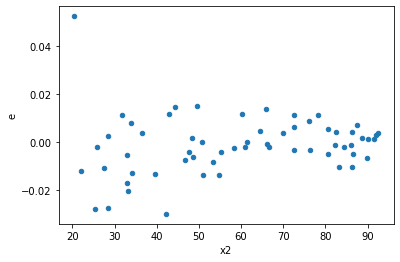

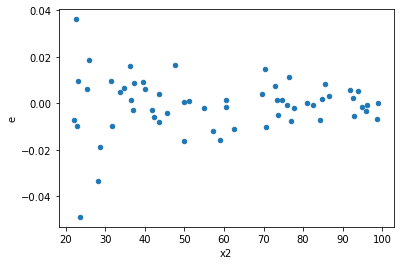

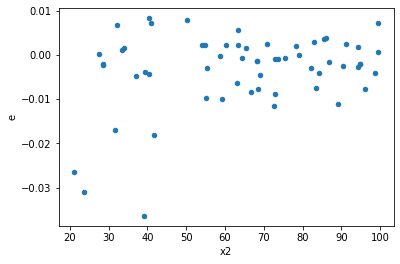

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,28.0,28.0,0.0030020098652267777,0.0037676083278303575,0.0001072146380438135,0.00013455744027965564,1.2550286298095643,0.5518228856143659,0.7240885571928171,0.27591144280718294,Reject005=1 : Homoscedasticity
1.0,28.0,28.0,0.0019936990658198537,0.008185969332795572,7.120353806499477e-05,0.00029235604759984184,4.105920232966212,0.0003621359937620028,0.999818932003119,0.0001810679968810014,Reject005=0 : Heteroscedasticity
2.0,24.0,32.0,0.00222039473948866,0.008720068910292372,9.251644747869417e-05,0.0002725021534466366,2.945445495076881,0.004698474596731783,0.9976507627016341,0.0023492372983658916,Reject005=0 : Heteroscedasticity
3.0,38.0,18.0,0.001443015661443242,0.005774677352344679,3.7974096353769526e-05,0.0003208154084635933,8.44826972246694,1.3067009346334757e-05,0.9999934664953268,6.5335046731673785e-06,Reject005=0 : Heteroscedasticity
4.0,34.0,22.0,0.0019356093328154263,0.002043714590210865,5.6929686259277246e-05,9.28961177368575e-05,1.6317693604313368,0.23043724553240152,0.8847813772337992,0.11521862276620076,Reject005=1 : Homoscedasticity
8.0,34.0,22.0,0.0010751546194590817,0.004406269437573267,3.1622194689972995e-05,0.0002002849744351485,6.333683553553491,2.7542873419994507e-05,0.99998622856329,1.3771436709997253e-05,Reject005=0 : Heteroscedasticity
9.0,22.0,34.0,0.0038478523263552724,0.005926687900421355,0.0001749023784706942,0.00017431435001239278,0.9966379619108499,0.9847120931319322,0.5076439534340339,0.4923560465659661,Reject005=1 : Homoscedasticity
10.0,28.0,28.0,0.0007274595122994922,0.006366590923922405,2.5980696867839006e-05,0.00022737824728294304,8.75181479694681,1.5484745996552363e-07,0.99999992257627,7.742372998276181e-08,Reject005=0 : Heteroscedasticity
19.0,31.0,25.0,0.0018302083197056667,0.0021094683106810687,5.903897805502151e-05,8.437873242724275e-05,1.4292038108892366,0.3632747496172708,0.8183626251913646,0.1816373748086354,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,28.0,28.0,0.0030020098652267777,0.0037676083278303575,0.0001072146380438135,0.00013455744027965564,1.2550286298095643,0.5518228856143659,Reject005=1 : Homoscedasticity
1.0,28.0,28.0,0.0019936990658198537,0.008185969332795572,7.120353806499477e-05,0.00029235604759984184,4.105920232966212,0.0003621359937620028,Reject005=0 : Heteroscedasticity
2.0,24.0,32.0,0.00222039473948866,0.008720068910292372,9.251644747869417e-05,0.0002725021534466366,2.945445495076881,0.004698474596731783,Reject005=0 : Heteroscedasticity
3.0,38.0,18.0,0.001443015661443242,0.005774677352344679,3.7974096353769526e-05,0.0003208154084635933,8.44826972246694,1.3067009346334757e-05,Reject005=0 : Heteroscedasticity
4.0,34.0,22.0,0.0019356093328154263,0.002043714590210865,5.6929686259277246e-05,9.28961177368575e-05,1.6317693604313368,0.23043724553240152,Reject005=1 : Homoscedasticity
5.0,31.0,25.0,0.006585327985160996,0.0007889835578231514,0.00021242993500519342,3.155934231292606e-05,0.14856353607675163,1.4965039604362982e-06,Reject005=0 : Heteroscedasticity
6.0,29.0,27.0,0.004852462820040094,0.0006573252501945369,0.0001673263041393136,2.43453796368347e-05,0.1454964284429845,1.7623908114366547e-06,Reject005=0 : Heteroscedasticity
7.0,33.0,23.0,0.00405589795179473,0.001255345232392281,0.00012290599853923424,5.458022749531656e-05,0.4440810712578311,0.03238779706097626,Reject005=0 : Heteroscedasticity
8.0,34.0,22.0,0.0010751546194590817,0.004406269437573267,3.1622194689972995e-05,0.0002002849744351485,6.333683553553491,2.7542873419994507e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    689
Reject005=1 : Homoscedasticity      311
Name: Result_test, dtype: int64